# <span style="color:blue; font-size:16;">Example saspy notebook showing the python interface to SAS</span>

# Import HTML to use to display results from the LST

In [1]:
from IPython.display import HTML 


# Import the saspy module to get access to SAS 

In [2]:
import saspy

In [3]:
saspy

<module 'saspy' from '/opt/tom/github/saspy/saspy/__init__.py'>

### Instantiate a SASsession object. This creates the SAS session that will be used for this notebook

In [4]:
sas = saspy.SASsession(cfgname='zos') #, results='HTML')#, omrpw='333') 

SAS Connection established. Subprocess id is 3737



In [5]:
x= sas.submit('''
    options filesystem=hfs;
    
''')

### Delete the '#' sign bellow (comment), and put the cursor after the dot (.) and hit Tab. It will show you the methods available from the SASsession object

In [6]:
sas

Access Method         = IOM
SAS Config name       = zos
WORK Path             = /tmp/SAS_util000102010396_DEVA/SAS_util000202010396_DEVA/
SAS Version           = 9.04.01M4P11092016
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = OPEN_ED-1047
Python Encoding value = cp1047

### Create a SASdata object to use to access the cars data set in the sashelp library. 

In [7]:
cars = sas.sasdata('cars', libref='sashelp')

### Again, remove the comment character, #, and after the dot, hit Tab to see the methods available on the SASdata object

In [8]:
cars

Libref  = sashelp
Table   = cars
Dsopts  = {}
Results = Pandas

#### Try out any other methods too. To see the method signature (parameters and return type) just type the method with a ? at the end and submit;<br><br>**<span style="color:blue; font-size:16;">cars.hist?</span>**<br><br>This will pop up a window at the bottome and show information about the method.

In [9]:
?cars.heatmap


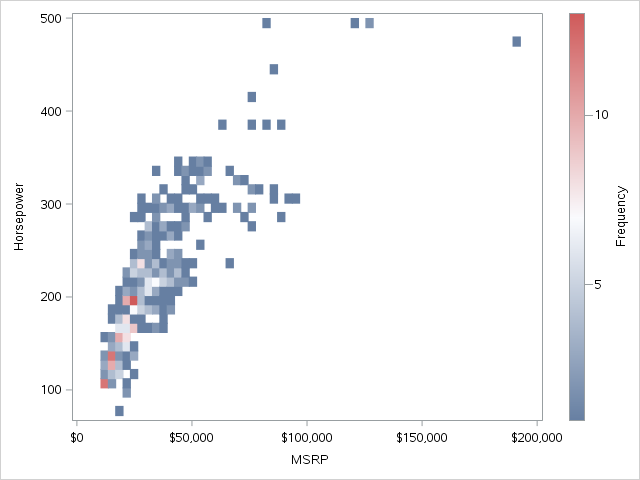

In [10]:
cars.heatmap('msrp','horsepower')

In [11]:
cars.tail()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,40083,2.3,5,242,20,26,3450,105,186
1,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,42573,2.9,6,268,19,26,3653,110,190
2,Volvo,XC90 T6,SUV,Europe,All,41250,38851,2.9,6,268,15,20,4638,113,189
3,Volvo,V40,Wagon,Europe,Front,26135,24641,1.9,4,170,22,29,2822,101,180
4,Volvo,XC70,Wagon,Europe,All,35145,33112,2.5,5,208,20,27,3823,109,186


In [12]:
ll=sas.submit('''
data cars2;
  set sashelp.cars;
run;

proc print data=cars2(obs=3);run;

''')
HTML(ll['LST'])


Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186


In [13]:
mycars = sas.sasdata('cars2')

In [14]:
mycars.sort('horsepower').head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Honda,Insight 2dr (gas/electric),Hybrid,Asia,Front,19110,17911,2.0,3,73,60,66,1850,95,155
1,Honda,Civic Hybrid 4dr manual (gas/electric),Hybrid,Asia,Front,20140,18451,1.4,4,93,46,51,2732,103,175
2,Volkswagen,Jetta GLS TDI 4dr,Sedan,Europe,Front,21055,19638,1.9,4,100,38,46,3003,99,172
3,Chevrolet,Aveo 4dr,Sedan,USA,Front,11690,10965,1.6,4,103,28,34,2370,98,167
4,Chevrolet,Aveo LS 4dr hatch,Sedan,USA,Front,12585,11802,1.6,4,103,28,34,2348,98,153



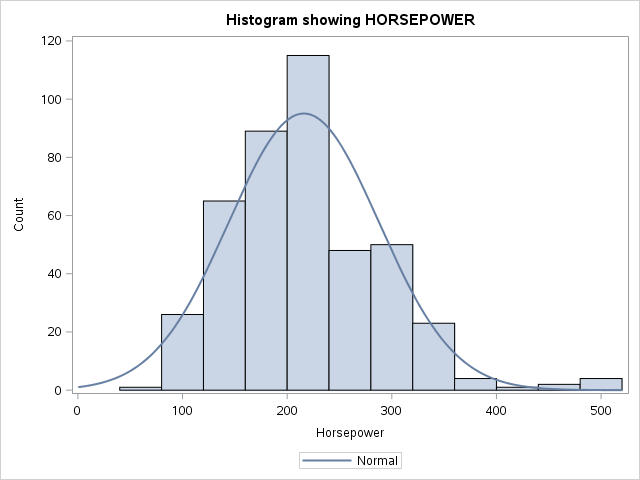


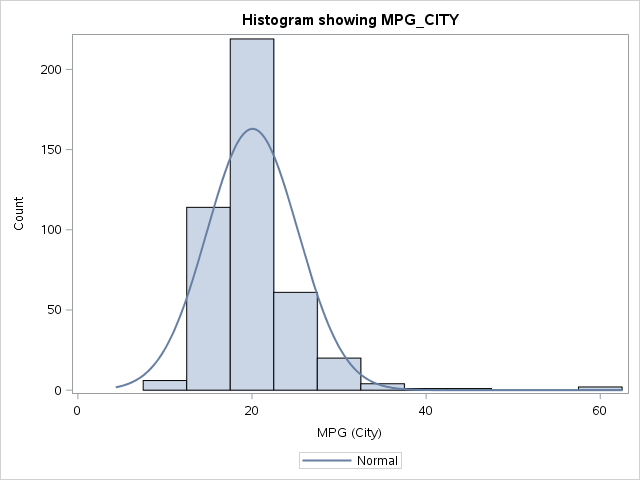


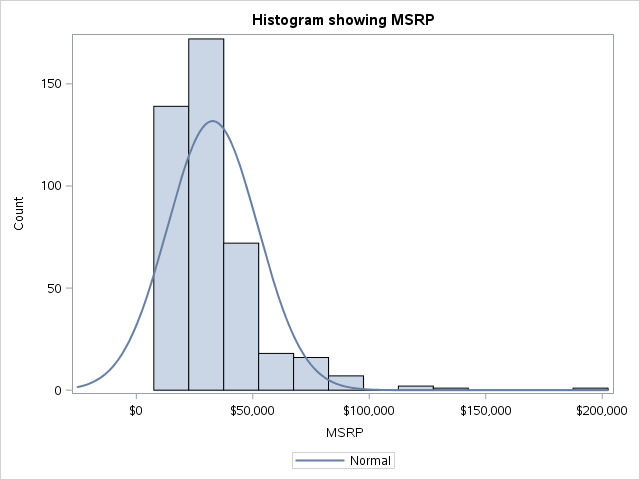

In [15]:
for col in ['horsepower','MPG_City', 'MSRP']:
    cars.hist(col, title='Histogram showing '+col.upper())

In [16]:
cars.describe()

,Variable,Label_c,N,NMiss,Median,Mean,StdDev,Min,P25,P50,P75,Max
0,MSRP,.,428,0,27635.0,32774.855140,19431.716674,10280.0,20329.50,27635.0,39215.0,192465.0
1,Invoice,.,428,0,25294.5,30014.700935,17642.117750,9875.0,18851.00,25294.5,35732.5,173560.0
2,EngineSize,.,428,0,3.0,3.196729,1.108595,1.3,2.35,3.0,3.9,8.3
3,Cylinders,.,426,2,6.0,5.807512,1.558443,3.0,4.00,6.0,6.0,12.0
4,Horsepower,.,428,0,210.0,215.885514,71.836032,73.0,165.00,210.0,255.0,500.0
5,MPG_City,.,428,0,19.0,20.060748,5.238218,10.0,17.00,19.0,21.5,60.0
6,MPG_Highway,.,428,0,26.0,26.843458,5.741201,12.0,24.00,26.0,29.0,66.0
7,Weight,.,428,0,3474.5,3577.953271,758.983215,1850.0,3103.00,3474.5,3978.5,7190.0
8,Wheelbase,.,428,0,107.0,108.154206,8.311813,89.0,103.00,107.0,112.0,144.0
9,Length,.,428,0,187.0,186.362150,14.357991,143.0,178.00,187.0,194.0,238.0


In [17]:
cars.set_results('pandas')
df = cars.describe()

In [18]:
df

,Variable,Label_c,N,NMiss,Median,Mean,StdDev,Min,P25,P50,P75,Max
0,MSRP,.,428,0,27635.0,32774.855140,19431.716674,10280.0,20329.50,27635.0,39215.0,192465.0
1,Invoice,.,428,0,25294.5,30014.700935,17642.117750,9875.0,18851.00,25294.5,35732.5,173560.0
2,EngineSize,.,428,0,3.0,3.196729,1.108595,1.3,2.35,3.0,3.9,8.3
3,Cylinders,.,426,2,6.0,5.807512,1.558443,3.0,4.00,6.0,6.0,12.0
4,Horsepower,.,428,0,210.0,215.885514,71.836032,73.0,165.00,210.0,255.0,500.0
5,MPG_City,.,428,0,19.0,20.060748,5.238218,10.0,17.00,19.0,21.5,60.0
6,MPG_Highway,.,428,0,26.0,26.843458,5.741201,12.0,24.00,26.0,29.0,66.0
7,Weight,.,428,0,3474.5,3577.953271,758.983215,1850.0,3103.00,3474.5,3978.5,7190.0
8,Wheelbase,.,428,0,107.0,108.154206,8.311813,89.0,103.00,107.0,112.0,144.0
9,Length,.,428,0,187.0,186.362150,14.357991,143.0,178.00,187.0,194.0,238.0


In [19]:
df[2:4]

,Variable,Label_c,N,NMiss,Median,Mean,StdDev,Min,P25,P50,P75,Max
2,EngineSize,.,428,0,3.0,3.196729,1.108595,1.3,2.35,3.0,3.9,8.3
3,Cylinders,.,426,2,6.0,5.807512,1.558443,3.0,4.00,6.0,6.0,12.0


In [20]:
cars.set_results(results='html')

In [21]:
#sas.saslib('Tera', engine='Teradata', options='user=&user pw=&mypw server=teracop1', prompt={'user': False, 'mypw': True})

### The SASsession object has a **submit** method to submit any SAS code you want.<br>It returns a dictionary with the LOG and the LST.<br>You can print the log and HTML the results from the Listing. <br> <br>  With the PROMPT= option, you can code macro variables in your code and ask to be prompted for values at run time. True is to hide the input and delete the macro variable after use, which is for passwords and such. False lets you see what you entered and keeps the macro variables available for the rest of the session.

In [22]:
HTML(sas.submit('''
proc print data=&dsname;
run;
''')['LST'])

In [23]:
HTML(ll['LST'])

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186


In [24]:
print(ll['LOG'])

16                                                         The SAS System                              14:11 Wednesday, May 24, 2017

144        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg; ods graphics on /
144      !  outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
145        
146        
147        data cars2;
148          set sashelp.cars;
149        run;

NOTE: There were 428 observations read from the data set SASHELP.CARS.
NOTE: The data set WORK.CARS2 has 428 observations and 15 variables.
NOTE: The DATA statement used 0.00 CPU seconds and 70796K.

NOTE: The address space has used a maximum of 1080K below the line and 706288K above the line.


150        
151        proc print data=cars2(obs=3);run;

NOTE: There were 3 observations read from the data set WORK.CARS2.
NOTE: The PROCEDURE PRINT used 0.02 CPU seconds and 73070K.

NOTE: The address space has used a maximum of 1080K below the line and 

In [25]:
#ll = sas.submit('%put dsname=&dsname; %put var1=&var1; %put pw=&pw;')

In [26]:
#print(ll['LOG'])

#### You can always see the entire session log by using the saslog() method of the SASsession object.

In [27]:
print(sas.saslog())

1                                                          The SAS System                              14:11 Wednesday, May 24, 2017

NOTE: Copyright (c) 2002-2012 by SAS Institute Inc., Cary, NC, USA. 
NOTE: SAS (r) Proprietary Software 9.4 (TS1M4) 
      Licensed to MVS SID, Site 70068122.
NOTE: This session is executing on the z/OS   V02R02M00 platform.

NOTE: Running on IBM Model 2964 Serial Number 035EA6.


NOTE: Updated analytical products:
      
      SAS/STAT 14.2
      SAS/ETS 14.2
      SAS/OR 14.2
      SAS/IML 14.2
      SAS/QC 14.2

NOTE: Additional host information:

IBM 2964-705, DEVA, FMID HBB77A0, CPU: 7, GP: 5, zAAP: 0, zIIP: 2

                            Welcome to SAS                              
                                                                        
                                                                        
                                                                        
This message displays in the SAS log when the NEWS 

## Want to read and write CSV files?

In [28]:
sas.workpath

'/tmp/SAS_util000102010396_DEVA/SAS_util000202010396_DEVA/'

In [29]:
#cars.to_csv(sas.workpath+"cars.csv")

In [30]:
#carscsv = sas.read_csv(sas.workpath+"cars.csv", 'cars_cvs')

In [31]:
#carscsv.sort('descending horsepower').head(7)

## We can transfer data between SAS Data Sets and Pandas Data Frames 

In [32]:
import pandas

In [33]:
car_df = cars.to_df()

In [34]:
type(cars)

saspy.sasbase.SASdata

In [35]:
type(car_df)

pandas.core.frame.DataFrame

In [36]:
cars.means()

Variable,Label,N,N Miss,Median,Mean,Std Dev,Minimum,25th Pctl,50th Pctl,75th Pctl,Maximum
MSRP,,428,0,27635,32775,19432,10280,20330,27635,39215,192465
Invoice,,428,0,25295,30015,17642,9875.000000,18851,25295,35733,173560
EngineSize,Engine Size (L),428,0,3.000000,3.196729,1.108595,1.300000,2.350000,3.000000,3.900000,8.300000
Cylinders,,426,2,6.000000,5.807512,1.558443,3.000000,4.000000,6.000000,6.000000,12.000000
Horsepower,,428,0,210.000000,215.885514,71.836032,73.000000,165.000000,210.000000,255.000000,500.000000
MPG_City,MPG (City),428,0,19.000000,20.060748,5.238218,10.000000,17.000000,19.000000,21.500000,60.000000
MPG_Highway,MPG (Highway),428,0,26.000000,26.843458,5.741201,12.000000,24.000000,26.000000,29.000000,66.000000
Weight,Weight (LBS),428,0,3474.500000,3577.953271,758.983215,1850.000000,3103.000000,3474.500000,3978.500000,7190.000000
Wheelbase,Wheelbase (IN),428,0,107.000000,108.154206,8.311813,89.000000,103.000000,107.000000,112.000000,144.000000
Length,Length (IN),428,0,187.000000,186.362150,14.357991,143.000000,178.000000,187.000000,194.000000,238.000000


In [37]:
car_df.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [38]:
cars.head()

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6,225,18,24,3893,115,197


In [39]:
car_df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int64
Invoice          int64
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [40]:
cars.contents()

## Now round trip the Data Frame back to a SAS Data Set

In [41]:
cars_full_circle = sas.df2sd(car_df, 'cfc')

In [42]:
cars_full_circle.describe()

,Variable,N,NMiss,Median,Mean,StdDev,Min,P25,P50,P75,Max
0,MSRP,428,0,27635.0,32774.855140,19431.716674,10280.0,20329.50,27635.0,39215.0,192465.0
1,Invoice,428,0,25294.5,30014.700935,17642.117750,9875.0,18851.00,25294.5,35732.5,173560.0
2,EngineSize,428,0,3.0,3.196729,1.108595,1.3,2.35,3.0,3.9,8.3
3,Cylinders,426,2,6.0,5.807512,1.558443,3.0,4.00,6.0,6.0,12.0
4,Horsepower,428,0,210.0,215.885514,71.836032,73.0,165.00,210.0,255.0,500.0
5,MPG_City,428,0,19.0,20.060748,5.238218,10.0,17.00,19.0,21.5,60.0
6,MPG_Highway,428,0,26.0,26.843458,5.741201,12.0,24.00,26.0,29.0,66.0
7,Weight,428,0,3474.5,3577.953271,758.983215,1850.0,3103.00,3474.5,3978.5,7190.0
8,Wheelbase,428,0,107.0,108.154206,8.311813,89.0,103.00,107.0,112.0,144.0
9,Length,428,0,187.0,186.362150,14.357991,143.0,178.00,187.0,194.0,238.0


# Now let's look at the SASstat object!

In [43]:
stat = sas.sasstat()

In [44]:
#stat.                 # use the 'dot Tab ' to see the methods available

### Let's run a regression which will return us a SASresults object that we can use to see any/all of the results

In [45]:
stat_results = stat.reg(model='horsepower = Cylinders EngineSize', data=cars)

### What results are available?

In [46]:
dir(stat_results)

['ANOVA',
 'COOKSDPLOT',
 'DFBETASPANEL',
 'DFFITSPLOT',
 'DIAGNOSTICSPANEL',
 'FITSTATISTICS',
 'LOG',
 'NOBS',
 'OBSERVEDBYPREDICTED',
 'PARAMETERESTIMATES',
 'QQPLOT',
 'RESIDUALBOXPLOT',
 'RESIDUALBYPREDICTED',
 'RESIDUALHISTOGRAM',
 'RESIDUALPLOT',
 'RFPLOT',
 'RSTUDENTBYLEVERAGE',
 'RSTUDENTBYPREDICTED']

### Pick any one you want ...


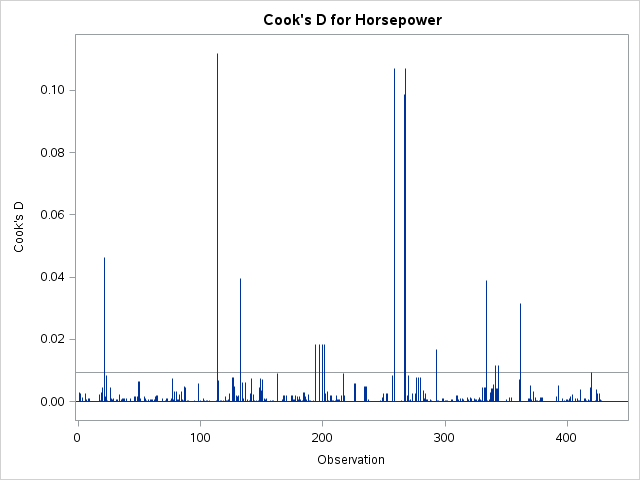

In [47]:
stat_results.COOKSDPLOT

### Or display them ALL  (Click in the pannel to the Left of the results below to expand/shrink the result pane)

,Source,DF,SS,MS,FValue,ProbF
0,Model,2,1.487804e+06,743901.866012,440.192215,0.0
1,Error,423,7.148479e+05,1689.947803,NaN,NaN
2,Corrected Total,425,2.202652e+06,NaN,NaN,NaN



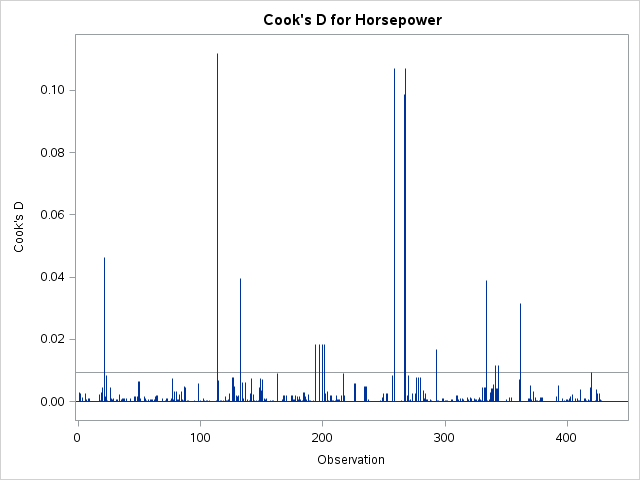


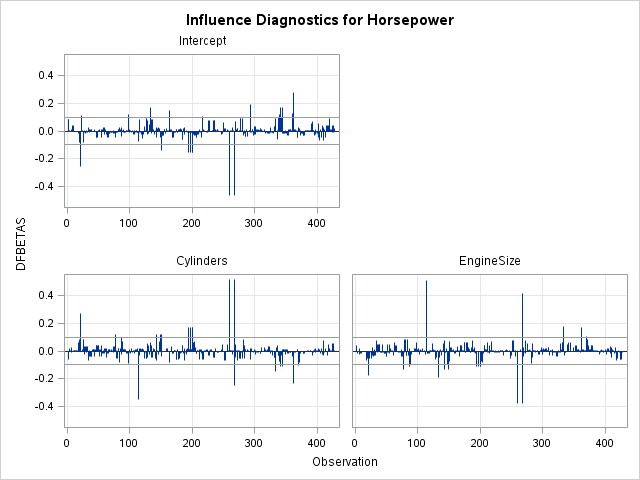


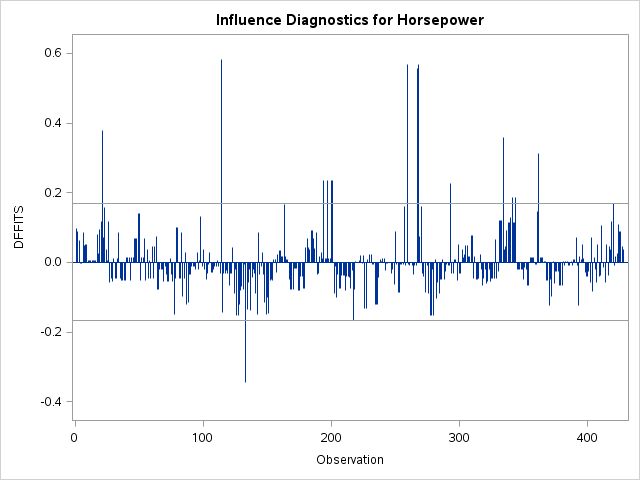


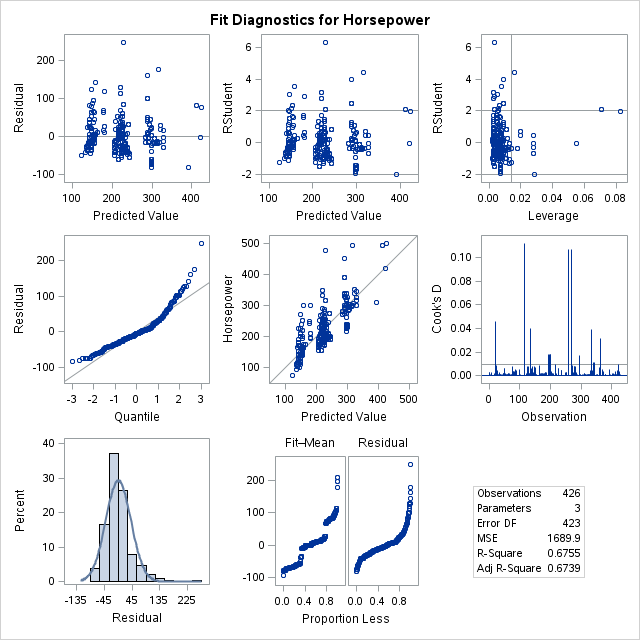

,Label1,cValue1,nValue1,Label2,cValue2,nValue2
0,Root MSE,41.10897,41.108975,R-Square,0.6755,0.675460
1,Dependent Mean,215.87793,215.877934,Adj R-Sq,0.6739,0.673926
2,Coeff Var,19.04269,19.042694,,,0.000000


,N,NObsRead,NObsUsed,SumFreqsRead,SumFreqsUsed,NObsMiss
0,428,428,426,428,426,2
1,426,428,426,428,426,2
2,2,428,426,428,426,2



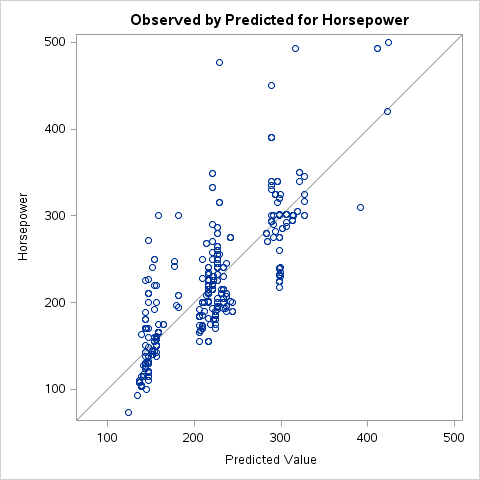

,Variable,DF,Estimate,StdErr,tValue,Probt,Label
0,Intercept,1,9.766817,8.023541,1.217270,2.241801e-01,Intercept
1,Cylinders,1,23.702956,3.054032,7.761202,6.382821e-14,
2,EngineSize,1,21.354879,4.313046,4.951229,1.067389e-06,Engine Size (L)



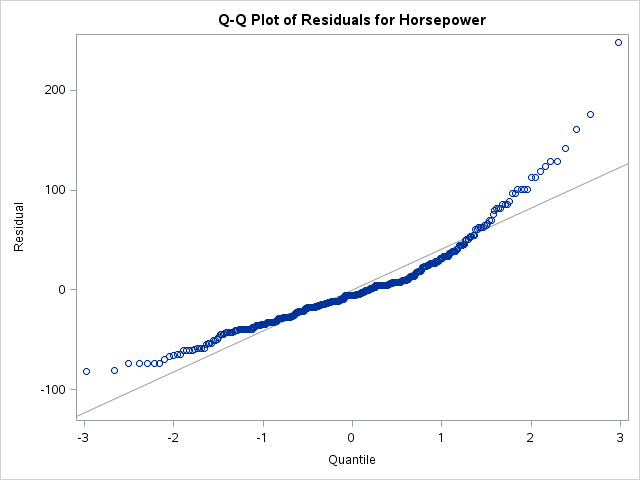


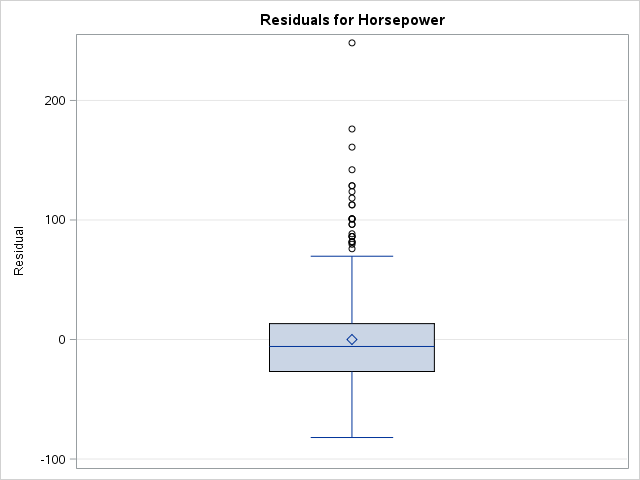


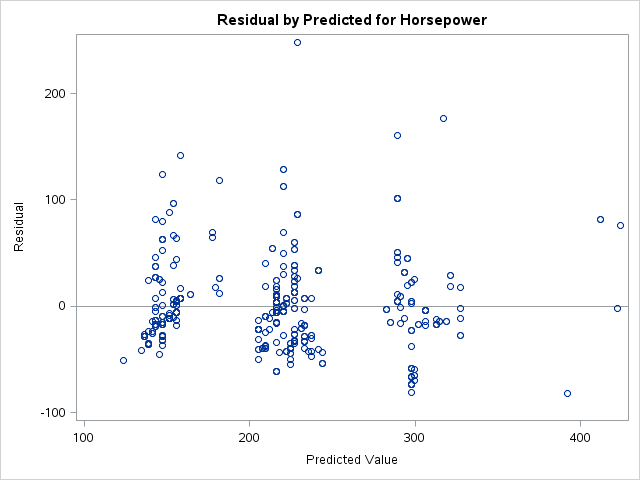


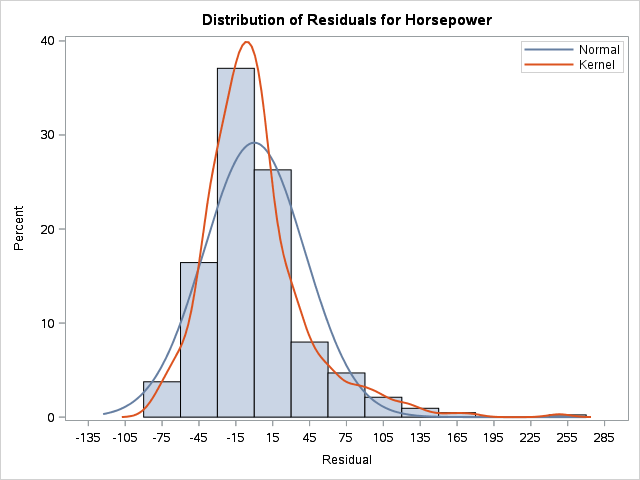


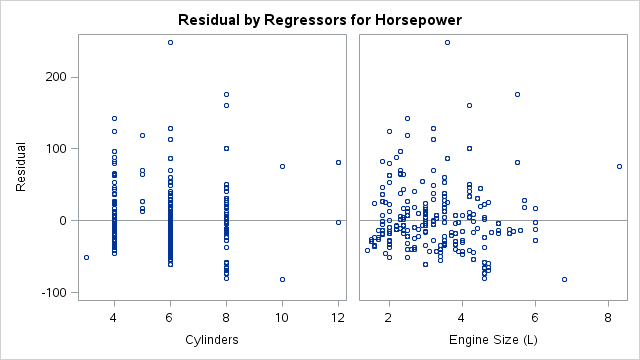


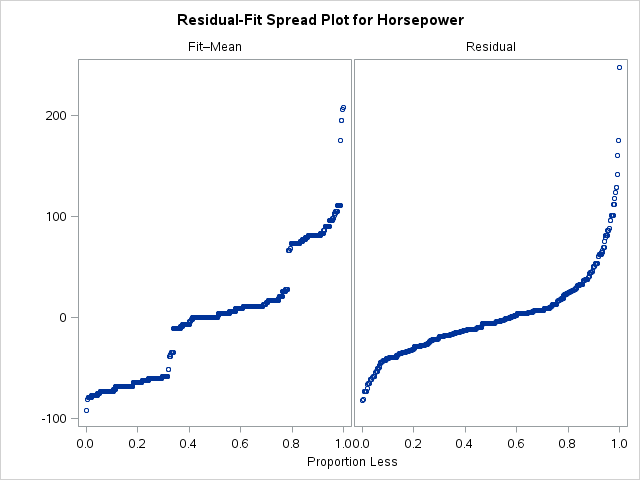


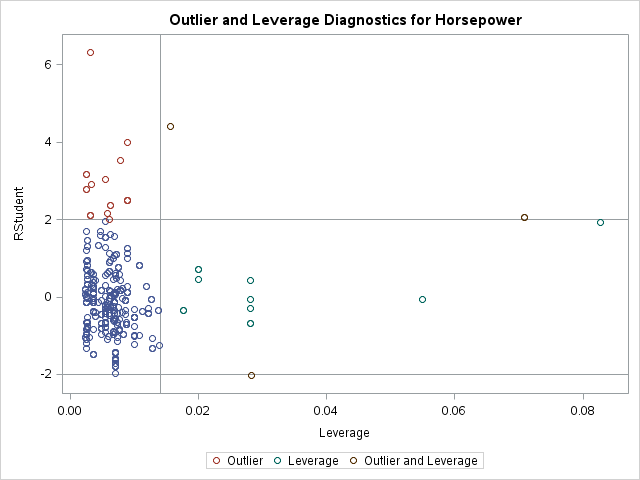


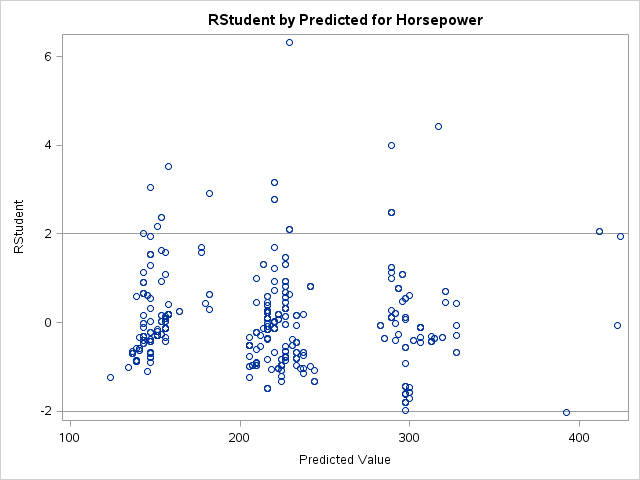

In [48]:
stat_results.ALL()

### Proc SQL anyone???  
#### And you can use the SASLIB method of the SASsession to assign any data you like (Teradata, Hadoop, ...)

In [49]:
#sas.saslib('Tera', engine='Teradata', options='user=sastpw pw=&mypw server=teracop1', prompt={'mypw': True})
ll = sas.submit('''
proc sql; 
   create table sales as 
   select month,
          sum(actual) as tot_sales,
          sum(predict) as predicted_sales
   from sashelp.prdsale
   group by 1
   order by month;
quit;
''')
sales = sas.sasdata('sales')

In [50]:
print(ll['LOG']);HTML(ll['LST'])

104                                                        The SAS System                              14:11 Wednesday, May 24, 2017

1600       ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg; ods graphics on /
1600     !  outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
1601       
1602       
1603       proc sql;
1604          create table sales as
1605          select month,
1606                 sum(actual) as tot_sales,
1607                 sum(predict) as predicted_sales
1608          from sashelp.prdsale
1609          group by 1
1610          order by month;
NOTE: Table WORK.SALES created, with 24 rows and 3 columns.

1611       quit;
NOTE: The PROCEDURE SQL used 0.00 CPU seconds and 83290K.

NOTE: The address space has used a maximum of 1080K below the line and 733256K above the line.


1612       
1613       
1614       ods html5 (id=saspy_internal) close;ods listing;
1615       


### Let's chart our sales for the aggregate table we created with the Proc SQL


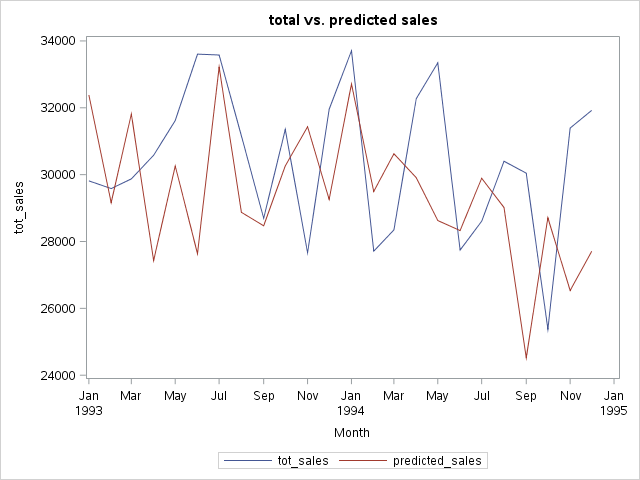

In [51]:
sales.series(y=['tot_sales','predicted_sales'], x='month', title='total vs. predicted sales')

## Try the ETS object; including cheking an error case first

In [52]:
ets = sas.sasets()

In [53]:
mycars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Honda,Insight 2dr (gas/electric),Hybrid,Asia,Front,19110,17911,2.0,3,73,60,66,1850,95,155
1,Honda,Civic Hybrid 4dr manual (gas/electric),Hybrid,Asia,Front,20140,18451,1.4,4,93,46,51,2732,103,175
2,Volkswagen,Jetta GLS TDI 4dr,Sedan,Europe,Front,21055,19638,1.9,4,100,38,46,3003,99,172
3,Chevrolet,Aveo 4dr,Sedan,USA,Front,11690,10965,1.6,4,103,28,34,2370,98,167
4,Chevrolet,Aveo LS 4dr hatch,Sedan,USA,Front,12585,11802,1.6,4,103,28,34,2348,98,153


In [54]:
ets_results = ets.timeid(id='horsepower', data=mycars)

In [55]:
dir(ets_results)

['DECOMPOSITIONPLOT',
 'INTERVALCOUNTSCOMPONENTPLOT',
 'LOG',
 'OFFSETCOMPONENTPLOT',
 'SPANCOMPONENTPLOT',
 'VALUESPLOT']


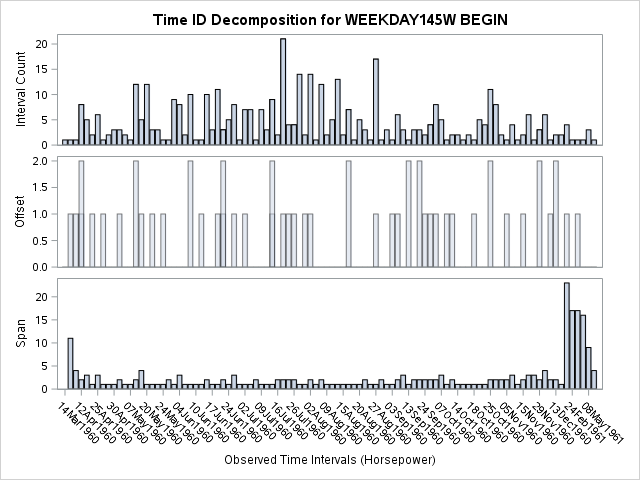

In [56]:
ets_results.DECOMPOSITIONPLOT


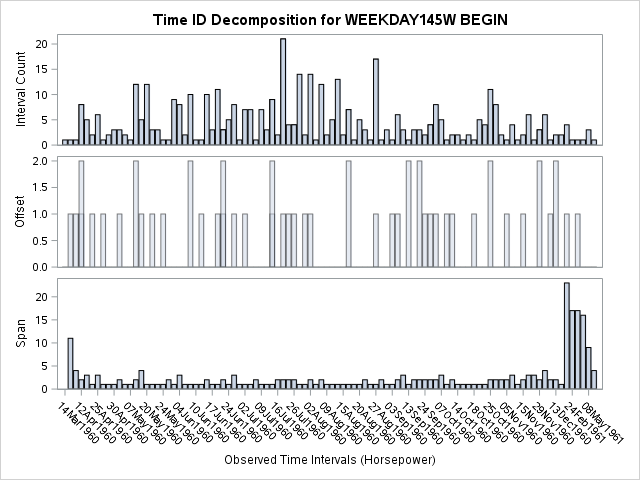


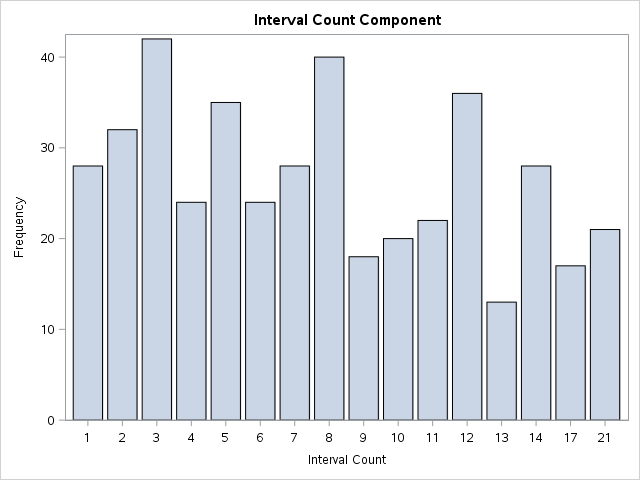


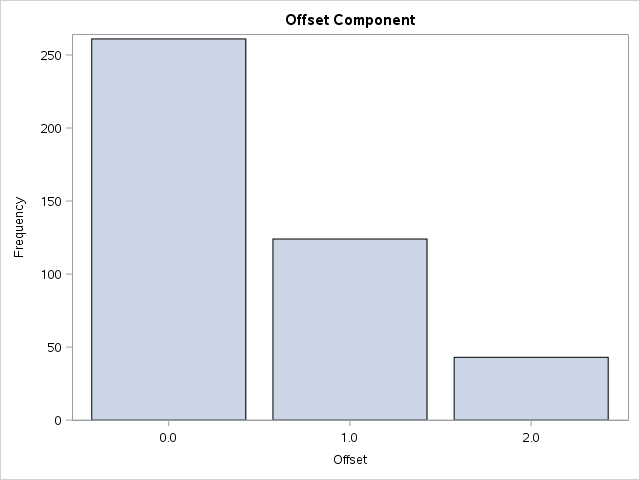


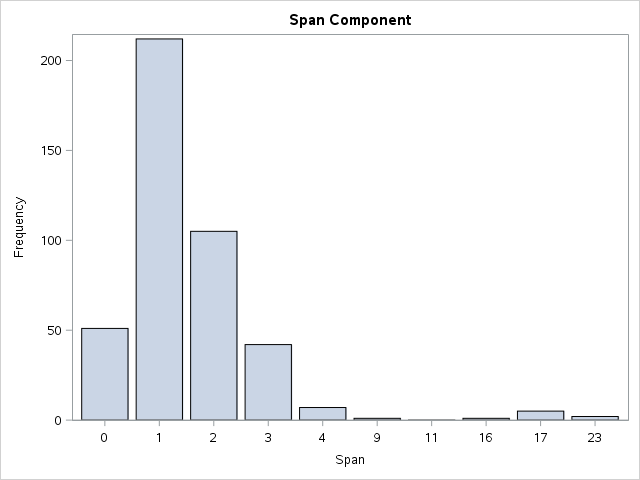


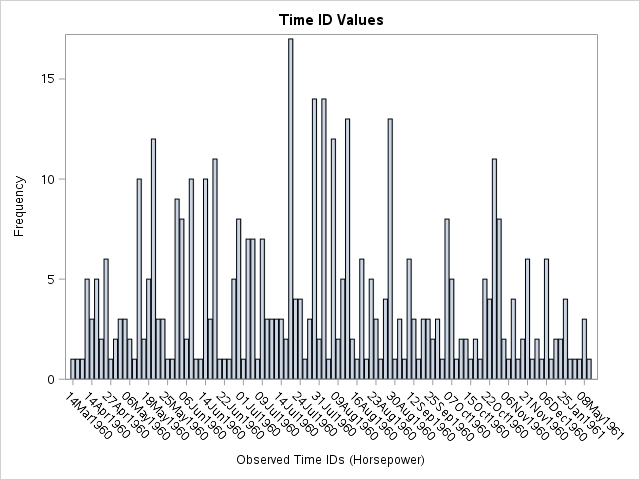

In [57]:
ets_results.ALL()

## Here's a setting for when you are running this in a python batch script. Use set_batch(True) to get a dictionary of LOG LST (like the submit method) instead of having the results displayed. This way  you can write out the HTML objects as files and view them from a web browser later! Anything you can do interactively in the notebook, you can run in batch and save the results for subsequent processing.

In [58]:
sas.set_batch(True)

In [59]:
plot = ets_results.DECOMPOSITIONPLOT


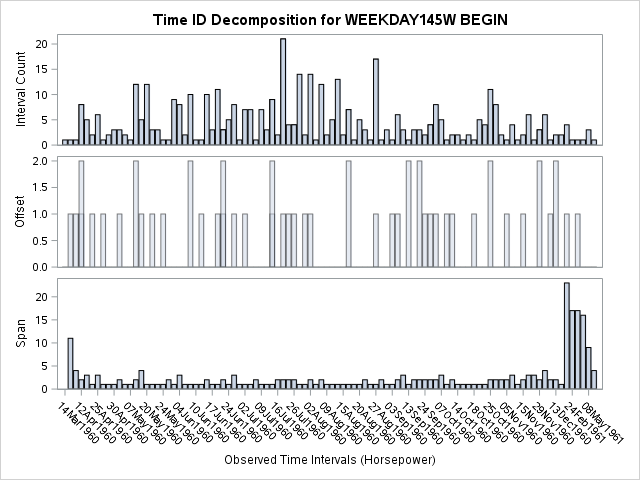

In [60]:
HTML(plot['LST'])

In [61]:
print(plot['LOG'])

123                                                        The SAS System                              14:11 Wednesday, May 24, 2017

1808       ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg; ods graphics on /
1808     !  outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
1809       
1810       %getdata(tim0002, DECOMPOSITIONPLOT);


NOTE: The PROCEDURE DOCUMENT used 0.61 CPU seconds and 83822K.

NOTE: The address space has used a maximum of 1080K below the line and 739488K above the line.


1811       
1812       ods html5 (id=saspy_internal) close;ods listing;
1813       


In [62]:
## So lets write these out to the file system as if this were a python batch script

In [63]:
for i in range(len(ets_results._names)):
    x = ets_results.__getattr__(ets_results._names[i])
    if type(x) is not str:
        out1 = open("/u/sastpw/saspy_demo/"+ets_results._names[i]+".html", mode='w+b')
        out1.write(x['LST'].encode())
        out1.close()
    else:
        out1 = open("/u/sastpw/saspy_demo/"+ets_results._names[i]+".log", mode='w+b')
        out1.write(x.encode())
        out1.close()

In [64]:
sas.set_batch(False)

## Now, let's learn a little SAS. With teach_me_SAS, any of the methods that run code will show you the code instead of running it. This way you can cut-n-paste it into a sas.submit() method and change it around and play with syntax and try your own version of code.

In [65]:
sas.teach_me_SAS(True)

In [66]:
sales.series(y=['tot_sales','predicted_sales'], x='month', title='total vs. predicted sales')

proc sgplot data=WORK.sales;
	title "total vs. predicted sales";
	series x=month y=tot_sales;
	series x=month y=predicted_sales;
run;
title "";


In [67]:
ets_results = ets.timeid(id='horsepower', data=cars)

%macro proccall(d);
proc timeid data=sashelp.cars plot=all  ;
id horsepower;
run; quit; %mend;
%mangobj(tim0003,timeid,cars);


In [68]:
stat_results = stat.reg(model='horsepower = Cylinders EngineSize', data=cars)

%macro proccall(d);
proc reg data=sashelp.cars plot=all  ;
model horsepower = Cylinders EngineSize;
run; quit; %mend;
%mangobj(reg0004,reg,cars);


In [69]:
cars.describe()

proc means data=sashelp.cars stackodsoutput n nmiss median mean std min p25 p50 p75 max;run;


In [70]:
cars.tail(24)

proc print data=sashelp.cars(firstobs=405 obs=428 );run;


In [71]:
sas.teach_me_SAS(False)

### When you shut down the notebook, SAS will terminate on its own. But you can shut it down yourself if you want.

In [72]:
sas._endsas()

SAS Connection terminated. Subprocess id was 3737


In [73]:
print(sas.saslog())

1                                                          The SAS System                              14:11 Wednesday, May 24, 2017

NOTE: Copyright (c) 2002-2012 by SAS Institute Inc., Cary, NC, USA. 
NOTE: SAS (r) Proprietary Software 9.4 (TS1M4) 
      Licensed to MVS SID, Site 70068122.
NOTE: This session is executing on the z/OS   V02R02M00 platform.

NOTE: Running on IBM Model 2964 Serial Number 035EA6.


NOTE: Updated analytical products:
      
      SAS/STAT 14.2
      SAS/ETS 14.2
      SAS/OR 14.2
      SAS/IML 14.2
      SAS/QC 14.2

NOTE: Additional host information:

IBM 2964-705, DEVA, FMID HBB77A0, CPU: 7, GP: 5, zAAP: 0, zIIP: 2

                            Welcome to SAS                              
                                                                        
                                                                        
                                                                        
This message displays in the SAS log when the NEWS 